# MEFE - TP computacional 3

**Tomás Di Napoli**

Este trabajo es la resolución del tercer TP computacional de [MEFE](http://materias.df.uba.ar/meefea2023c1/), cuya consigna se puede ver [acá](http://materias.df.uba.ar/meefea2023c1/files/2012/07/Test_de_Hip%C3%B3tesis_MEFE_2023_Madres21.pdf). También tiene su versión en [Jupyter Notebook]() junto con otros ejercicios de la materia que estoy subiendo a [este](https://github.com/tdinapoli/mefe/) repositorio de github.

Primero que nada importo las librerías que voy a usar y configuro el estilo de los gráficos

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as ss
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

/tmp/ipykernel_10017/4046873007.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


El problema consiste en hacer un test de hipótesis para determinar si la cantidad de hijas que tienen las levaduras por unidad de tiempo es constante o no en el tiempo. Entonces, a hipótesis nula **$H_0$ es: la tasa de nacimientos es independiente del tiempo.**

Según dice la consigna, el número de hijas que tiene una célula de levadura durante toda su vida tiene una distribución de probabilidad 
$$Weibull(x \mid \lambda, \alpha) = \lambda \alpha (\lambda x)^{\alpha - 1} e^{-(\lambda x)^\alpha} $$
con $\lambda = 1/30$ y $\alpha=1$ en el caso de que la tasa de nacimientos es independiente del tiempo, y la misma distribución pero con $\alpha=0.8$ en el caso en el que esa tasa decrece en el tiempo. Primero que nada entonces visualizo estas distribuciones y las comparo en un gráfico.

In [14]:
# Defino los parámetros
lmbd = 30
alpha1 = 1
alpha2 = 0.8
# Creo las variables aleatorias
wbc = ss.weibull_min(alpha1, scale=lmbd)
wbd = ss.weibull_min(alpha2, scale=lmbd)

Ahora grafico las pdf de las variables aleatorias entre los valores de $x$ para los cuales la cdf es 0.01 y 0.99.

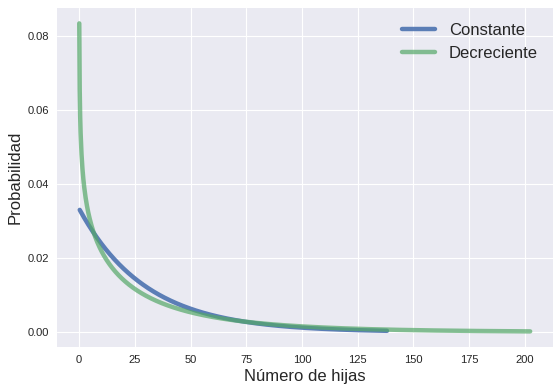

In [19]:
# Genero los x para graficar
x1 = np.linspace(wbc.ppf(0.01), wbc.ppf(0.99), 1000)
x2 = np.linspace(wbd.ppf(0.01), wbd.ppf(0.99), 1000)

# Grafico
plt.plot(x1, wbc.pdf(x1), lw=4, alpha=0.9, label="Constante")
plt.plot(x2, wbd.pdf(x2), lw=4, alpha=0.7, label="Decreciente")
plt.legend()
plt.xlabel("Número de hijas")
plt.ylabel("Probabilidad")
plt.show()

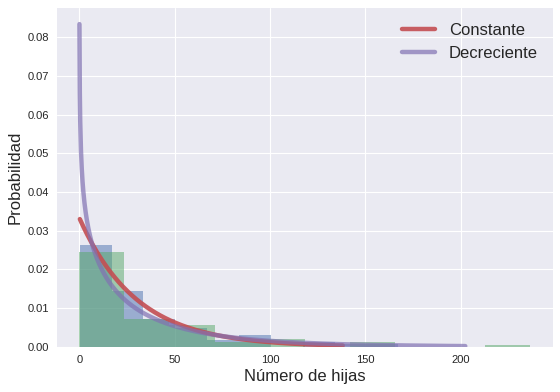

In [37]:
samplec = wbc.rvs(size=100)
sampled = wbd.rvs(size=100)

freq, bin_edges = np.histogram(samplec, density=True)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5)
freq, bin_edges = np.histogram(sampled, density=True)
plt.stairs(freq, bin_edges, fill=True, alpha=0.5)
plt.plot(x1, wbc.pdf(x1), lw=4, alpha=0.9, label="Constante")
plt.plot(x2, wbd.pdf(x2), lw=4, alpha=0.7, label="Decreciente")
plt.legend()
plt.xlabel("Número de hijas")
plt.ylabel("Probabilidad")
plt.show()